In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

In [ ]:
path = kagglehub.dataset_download("vinicius150987/ice-cream-revenue")

print("Path to dataset files:", path)
print(os.listdir(path))

Path to dataset files: /kaggle/input/ice-cream-revenue
['IceCreamData.csv', '.nfs000000002b27633c00000026']


In [ ]:
df = pd.read_csv('/kaggle/input/ice-cream-revenue/IceCreamData.csv')


In [ ]:
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [ ]:
df.isnull().sum()

,0
Temperature,0
Revenue,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
x = df.drop(['Revenue'],axis=1)

In [ ]:
y = df.drop(['Temperature'],axis=1)

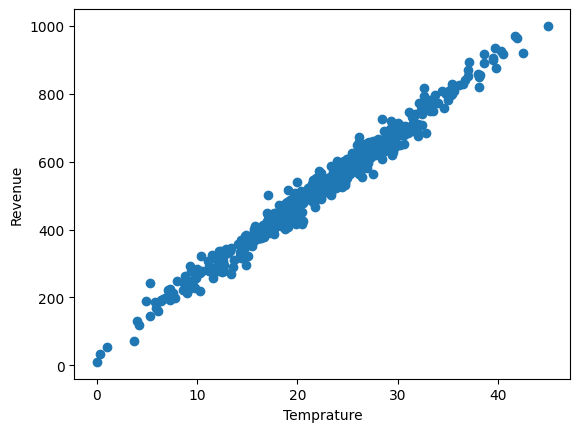

In [ ]:
plt.scatter(x='Temperature',y='Revenue',data=df)
plt.xlabel('Temprature')
plt.ylabel('Revenue')
plt.show() #almost perfectly linear data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
predictions = lr.predict(x_test)

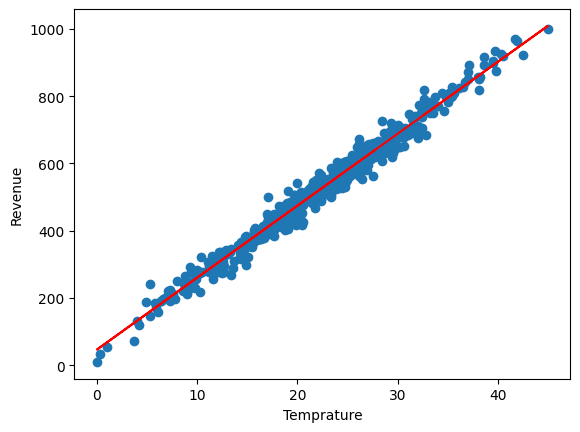

In [ ]:
plt.scatter(df['Temperature'],df['Revenue'])
plt.plot(x_train,lr.predict(x_train),color='red')
plt.xlabel('Temprature')
plt.ylabel('Revenue')
plt.show()

In [ ]:
m = lr.coef_
m

array([[21.38145125]])

In [ ]:
c = lr.intercept_
c


array([46.72052514])

Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
print("Mean Absolute error", mean_absolute_error(y_test,predictions))

Mean Absolute error 19.142772365687037


In [ ]:
print("Mean Squared error", mean_squared_error(y_test,predictions))

Mean Squared error 636.1533670417465


In [ ]:
print("Rooted mean Squared Error", np.sqrt(mean_squared_error(y_test,predictions)))

Rooted mean Squared Error 25.222080941939474


In [ ]:
r2 =  r2_score(y_test,predictions)
print("R2 error",r2) #very good predictions indeed

R2 error 0.973546292060864


In [ ]:
print("Adjacent R2 Error", (1 - ((1-r2)*(x_test.shape[0] -1)) / (x_test.shape[0]-1-1)))

Adjacent R2 Error 0.9732763562655666


In [ ]:
lr.predict(np.array(100).reshape(1,1)) #revenue if temprature spiked to 100 degree "Someones problem is someones fortune\"

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[2184.86564979]])

In [ ]:
y_test.iloc[0] #very less error as per regression

,129
Revenue,751.05457
